<a href="https://colab.research.google.com/github/prititaliya/ML-Algorithms-from-scratch/blob/main/Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [74]:
X,y=make_regression(n_samples=100,n_features=1,noise=20,random_state=13,n_informative=1)

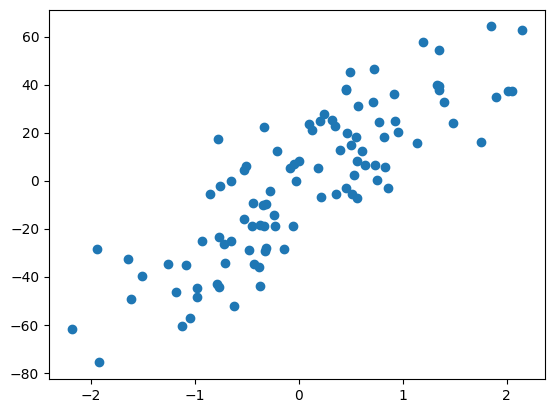

In [75]:
plt.scatter(X,y)
plt.show()

In [76]:
linModel=LinearRegression()
linModel=linModel.fit(X,y)

In [77]:
linM=linModel.coef_
linB=linModel.intercept_

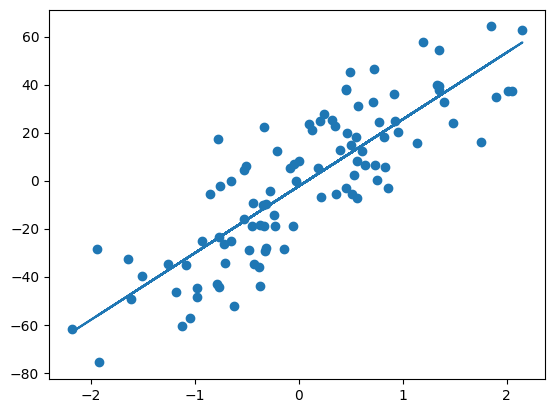

In [78]:
plt.scatter(X,y)
plt.plot(X,linM*X+linB)
plt.show()

In [79]:
class RidgeRegression:
    def __init__(self,alpha=0.01,lr=0.1,e=50):
        self.alpha=alpha
        self.lr=lr
        self.e=e
        self.m=None
        self.b=None

    def fit(self,X_train,y_train):
        num=0
        den=0

        for i in range(X_train.shape[0]):
            num=num+((y_train[i]-y_train.mean())*(X_train[i]-X_train.mean()))
            den=den+((X_train[i]-X_train.mean())*(X_train[i]-X_train.mean()))

        self.m=num/(den+self.alpha)
        self.b=y_train.mean()-(self.m*X_train.mean())


    def predict(self,X_test):
        return self.m*X_test+self.b

In [80]:
ridge=RidgeRegression(10,0.1,100)
ridge.fit(X,y)

In [81]:
print(ridge.m,ridge.b)
print(linM,linB)

[24.9546267] [-2.126913]
[27.82809103] -2.29474455867698


In [82]:
from sklearn.linear_model import Ridge

In [83]:
sridge=Ridge(10)
sridge.fit(X,y)
print(sridge.coef_,sridge.intercept_)

[24.9546267] -2.1269130035235735


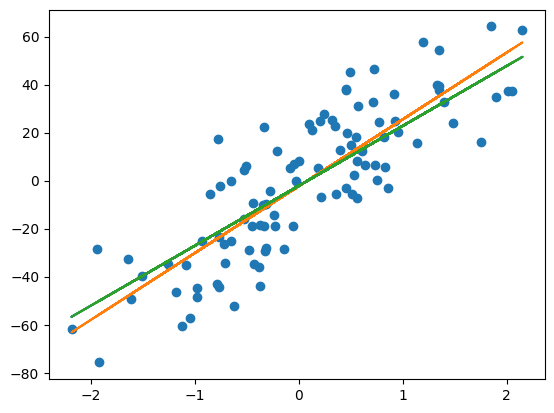

In [84]:
plt.scatter(X,y)
plt.plot(X,ridge.m*X+ridge.b)
plt.plot(X,linM*X+linB)
plt.plot(X,sridge.coef_*X+sridge.intercept_)
plt.show()

### up until now we were working with the one feature dataset
# now for nD feature follow steps below

In [120]:
class RidgeRegression_nD:
    def __init__(self, alpha):
        self.alpha = alpha
        self.inercept_ = None
        self.coef_ = None

    def fit(self, X_train, y_train):
       X_train = np.insert(X_train, 0, 1, axis=1)
       I=np.identity(X_train.shape[1])
    #    I[0][0]=0 # sckitlearn use this not sure why?
       result=np.linalg.inv(np.dot(X_train.T,X_train)+self.alpha*I).dot(X_train.T).dot(y_train)
       self.coef_ = result[1:]
       self.inercept_ = result[0]

    def predict(self, X):
        y_pred = np.dot(X, self.coef_) + self.inercept_
        return y_pred

In [121]:
from sklearn.datasets import load_diabetes
X,y=load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
sridge=Ridge(1)
sridge.fit(X_train,y_train)
print(sridge.coef_,sridge.intercept_)

[  45.36737726  -76.66608563  291.33883165  198.99581745   -0.53030959
  -28.57704987 -144.51190505  119.26006559  230.22160832  112.14983004] 152.241675211113


In [123]:
my_ridge=RidgeRegression_nD(1)
my_ridge.fit(X_train,y_train)
print(my_ridge.coef_,my_ridge.inercept_)

[  45.47181201  -76.6762269   291.44869895  199.04324049   -0.59896516
  -28.66783673 -144.56091695  119.24718353  230.27886422  112.27356587] 151.81076251348054


In [124]:
linModel=LinearRegression()
linModel=linModel.fit(X_train,y_train)
print(linModel.coef_,linModel.intercept_)

[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743] 151.34560453985995


In [125]:
from sklearn.metrics import r2_score

In [126]:
ypred1=linModel.predict(X_test)
yprred2=sridge.predict(X_test)
yprred3=my_ridge.predict(X_test)
print(r2_score(y_test,ypred1))
print(r2_score(y_test,yprred2))
print(r2_score(y_test,yprred3))

0.4526027629719195
0.41915292635986545
0.419239901560968
